<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#density-estimation" data-toc-modified-id="density-estimation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>density estimation</a></span></li><li><span><a href="#Backbone" data-toc-modified-id="Backbone-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Backbone</a></span></li><li><span><a href="#复杂数据" data-toc-modified-id="复杂数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>复杂数据</a></span></li><li><span><a href="#其他方法" data-toc-modified-id="其他方法-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>其他方法</a></span><ul class="toc-item"><li><span><a href="#hdbcan" data-toc-modified-id="hdbcan-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>hdbcan</a></span></li><li><span><a href="#谱聚类" data-toc-modified-id="谱聚类-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>谱聚类</a></span></li><li><span><a href="#meanshift" data-toc-modified-id="meanshift-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>meanshift</a></span></li><li><span><a href="#k-means" data-toc-modified-id="k-means-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>k-means</a></span></li><li><span><a href="#AgglomerativeClustering" data-toc-modified-id="AgglomerativeClustering-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>AgglomerativeClustering</a></span></li><li><span><a href="#AffinityPropagation" data-toc-modified-id="AffinityPropagation-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>AffinityPropagation</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#OPTICS" data-toc-modified-id="OPTICS-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>OPTICS</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import normalize
import sys
import imp
from scipy.special import softmax,entr
import pandas as pd
import plot_tools

/usr/data/gzy/software/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



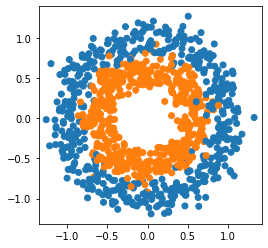

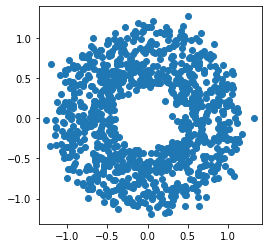

In [11]:
panda=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]
X=np.hstack([X,np.zeros((X.shape[0],2))])
X[:,-1]=np.arange(X.shape[0])
Y=panda.values[:,2]
Y[Y=='noise']=-1
Y=Y.astype(np.int)

plot_tools.autoPlot(X[:,:2],Y)
plot_tools.autoPlot(X[:,:2])

In [3]:
import imp
import dataset
imp.reload(dataset)
X,Y,known_mask,Y_init=dataset.load_data('circles',n_samples=1000,noiseX=0.1,noiseY=0.5,SP=0.01,Seed=2020,plot=False)
X=np.hstack([X,np.zeros((X.shape[0],2))])
X[:,-1]=np.arange(X.shape[0])

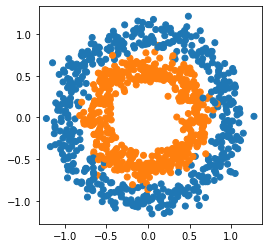

In [4]:
import plot_tools
imp.reload(plot_tools)
plot_tools.autoPlot(X[:,:2],y=np.argmax(Y,axis=1))

In [9]:
pandas=pd.DataFrame(X[:,:2])

In [ ]:
pandas

# density estimation

In [5]:
from KDE import Point_Distance

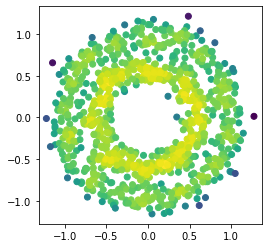

In [6]:
param=15
Dis=Point_Distance(X[:,:2],param=param+1)
D, I=Dis.get_DI(X[:,:2],param=param+1)#D,I:(N,k)  D:distance of neighbors I: index of neighbors
P=Dis.get_density(D) #计算点的密度
P=(P-np.min(P))/(np.max(P)-np.min(P))
X[:,-2]=P
plot_tools.autoPlot(X[:,:2],X[:,2],continues=True)

# Backbone

In [7]:
import backbone
imp.reload(backbone)

<module 'backbone' from '/usr/data/gzy/DGC/backbone.py'>

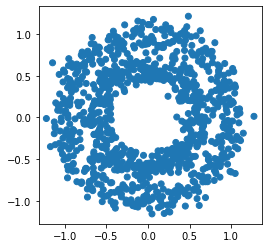

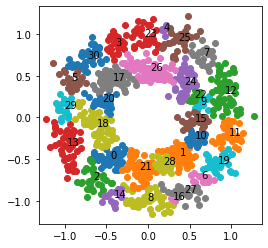

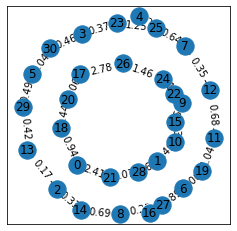

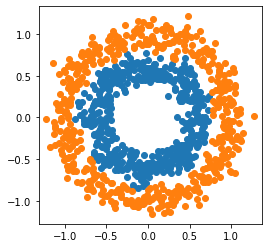

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


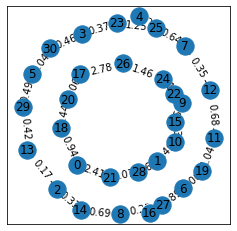

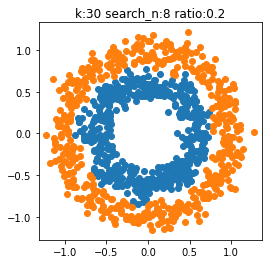

10.png
20.png
30.png
40.png
50.png
60.png
70.png
80.png
90.png
100.png
110.png
120.png
130.png
140.png
150.png
160.png
170.png
180.png
190.png
200.png
210.png
220.png
230.png
240.png
250.png
260.png
270.png
280.png
290.png
300.png
310.png
320.png
330.png
340.png
350.png
360.png
370.png
380.png
390.png
400.png
410.png
420.png
430.png
440.png
450.png
460.png
470.png
480.png
490.png
500.png
510.png
520.png
530.png
540.png
550.png
560.png
570.png
580.png
590.png
600.png
610.png
620.png
630.png
640.png
650.png
660.png
670.png
680.png
690.png
700.png
710.png
720.png
730.png
740.png
750.png
760.png
770.png
780.png
790.png
800.png
810.png
820.png
830.png
840.png
850.png
860.png
870.png
880.png
890.png
900.png
910.png
920.png
930.png
940.png
950.png
960.png
970.png
980.png
990.png
1000.png
1001.png
1002.png


In [8]:
X_copy=X.copy()
W,W2,draw_tasks=backbone.Backbone.fit(X,k=30,search_n=8,ratio=0.2,pnum=30,mp4=True,figroot='/usr/data/gzy/DGC/circles')

# 复杂数据

In [24]:
import pandas as pd
import backbone
imp.reload(backbone)

<module 'backbone' from 'C:\\Users\\Gao\\Desktop\\construct_graph\\SGLF\\DGC2\\backbone.py'>

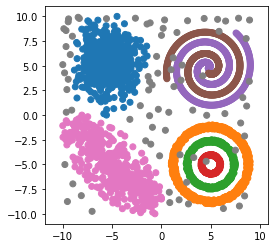

In [11]:
panda=pd.read_csv('./artificial_csv/impossible.csv', header=None)
X=panda.values[:,:2]
X=np.hstack([X,np.zeros((X.shape[0],2))])
X[:,-1]=np.arange(X.shape[0])
Y=panda.values[:,2]
Y[Y=='noise']=-1
Y=Y.astype(np.int)

plot_tools.autoPlot(X[:,:2],Y)

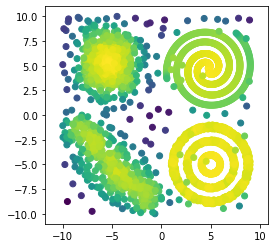

In [27]:
plot_tools.autoPlot(X[:,:2],X[:,2],continues=True)

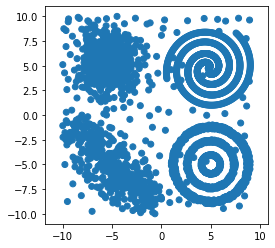

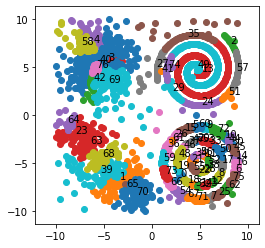

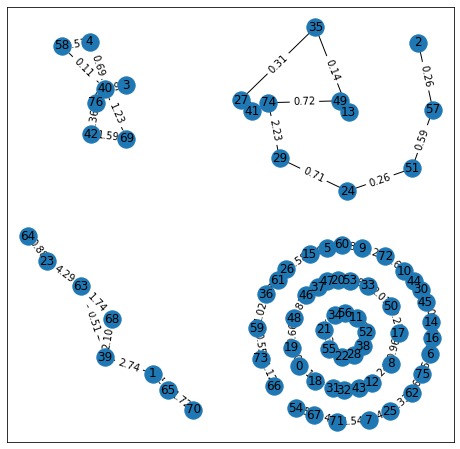

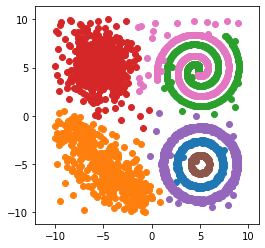

In [26]:
W,W2=backbone.Backbone.fit(X,k=25,search_n=9,ratio=0.1)

In [205]:
import json
centers=np.vstack([M.center for M in manifolds])

nodes=[[str(i+1),1,10,centers[i,0],-centers[i,1]] for i in range(centers.shape[0])]
W=(WA2-np.min(WA2))/(np.max(WA2)-np.min(WA2))
pair=np.nonzero(W)
edges=[[str(pair[1][i]+1), str(pair[0][i]+1),W[pair[0][i],pair[1][i]].astype(np.float) ] for i in range(pair[0].shape[0])]


save_dict = {'nodes': nodes, 'edges': edges}

with open('data.json', 'w') as result_file:
    json.dump(save_dict, result_file)

# 其他方法

https://scikit-learn.org/stable/modules/clustering.html

## hdbcan

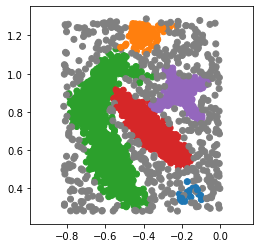

In [197]:
import hdbscan
from sklearn.datasets import make_blobs

clusterer = hdbscan.HDBSCAN(min_cluster_size=15,cluster_selection_epsilon=0.005)
cluster_labels = clusterer.fit_predict(X[:,:2])
plot_tools.autoPlot(X[:,:2],cluster_labels)

## 谱聚类

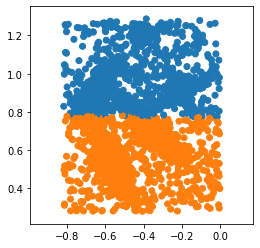

In [198]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X[:,:2])
plot_tools.autoPlot(X[:,:2],clustering.labels_)

## meanshift

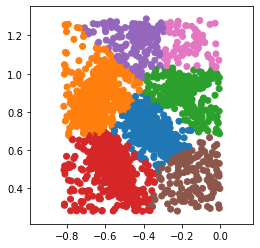

In [204]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X[:,:2], quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X[:,:2])
plot_tools.autoPlot(X[:,:2],ms.labels_)

## k-means

In [1119]:
from sklearn.cluster import MiniBatchKMeans, KMeans
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(X)
autoPlotly(X,k_means.labels_)

## AgglomerativeClustering

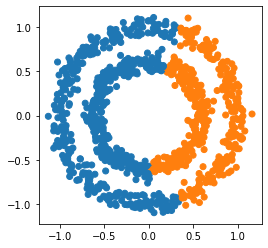

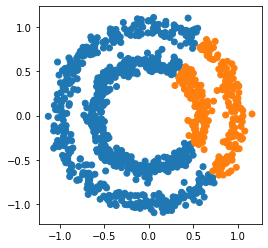

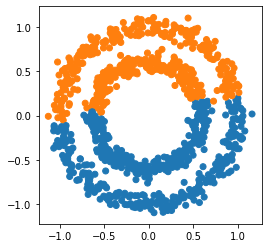

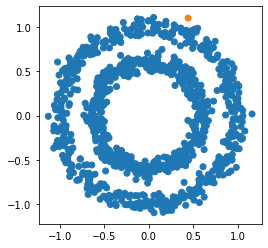

In [1120]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='complete').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='average').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='single').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

## AffinityPropagation

/opt/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



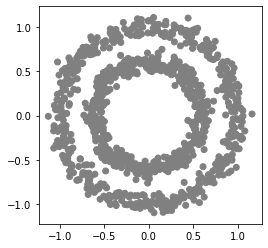

In [1121]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(X)
autoPlot(X,clustering.labels_)

## DBSCAN

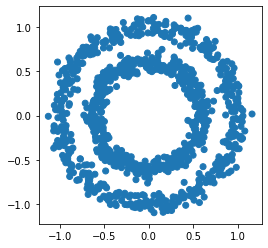

In [1124]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=10).fit(X)
autoPlot(X,clustering.labels_)

## OPTICS

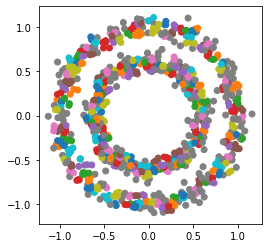

In [1125]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(X)
autoPlot(X,clustering.labels_)